In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string # zuerst entfernen wir die Satzzeichen
import nltk
import re
from nltk.corpus import stopwords # import stopword
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [4]:
df = pd.read_csv('scopus_dfg.csv')
#df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'scopus_dfg.csv'

In [3]:
df_dfg =df[['Authors','Year','Source title','Abstract','Index Keywords']]
df_dfg.head()

NameError: name 'df' is not defined

In [5]:
df_china = pd.read_csv('scopus _china.csv')
df_china=df_china[['Authors','Year','Source title','Abstract','Index Keywords']]
df_china['use as']='dual-use'
df_china.head()

FileNotFoundError: [Errno 2] No such file or directory: 'scopus _china.csv'

In [9]:
df_china.rename(columns={'Index Keywords':'Keywords'},inplace=True)

In [12]:
#df_dfg.at[0,'Abstract']

In [5]:
df_dfg['use as']='civilian'
df_dfg.head()

C:\Users\Budian\AppData\Local\Temp/ipykernel_26980/1630257906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dfg['use as']='civilian'


Authors  Year  \
0  Golivets M., Knapp S., Essl F., Lenzner B., La...  2024   
1                             Al Naggar Y., Wubet T.  2024   
2  Kaštovská E., Choma M., Angst G., Remus R., Au...  2024   
3      Zeng M., Krajinski F., van Dam N.M., Hause B.  2023   
4  Buchenauer L., Haange S.-B., Bauer M., Rolle-K...  2023   

                       Source title  \
0  Science of the Total Environment   
1  Science of the Total Environment   
2         Soil and Tillage Research   
3      Plant Signaling and Behavior   
4  Science of the Total Environment   

                                            Abstract  \
0  Many plant traits covary with environmental gr...   
1  Gut microbiome communities have a significant ...   
2  Erosion leads to a decline in carbon (C) stock...   
3  Jasmonates (JAs), including jasmonic acid (JA)...   
4  The past decade has been characterized by incr...   

                                      Index Keywords    use as  
0  Climate change; Climate models; Ecosystems; Pl...  civilian  
1  Bacteria; Eigenvalues and eigenfunctions; Food...  civilian  
2  Agricultural wastes; Biogeochemistry; Crop rot...  civilian  
3  cyclopentane derivative; isoleucine; jasmonic ...  civilian  
4  Diseases; Gene expression; Health risks; Herbi...  civilian

In [6]:
df_dfg.rename(columns={'Index Keywords':'Keywords'},inplace=True)
df_dfg

c:\python38\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Authors  Year  \
0     Golivets M., Knapp S., Essl F., Lenzner B., La...  2024   
1                                Al Naggar Y., Wubet T.  2024   
2     Kaštovská E., Choma M., Angst G., Remus R., Au...  2024   
3         Zeng M., Krajinski F., van Dam N.M., Hause B.  2023   
4     Buchenauer L., Haange S.-B., Bauer M., Rolle-K...  2023   
...                                                 ...   ...   
1995  Chen Y., Huang Y., Niklaus P.A., Castro-Izagui...  2020   
1996  Cole L.J., Kleijn D., Dicks L.V., Stout J.C., ...  2020   
1997                          Bucher S.F., Römermann C.  2020   
1998           Nilsen E.B., Bowler D.E., Linnell J.D.C.  2020   
1999          Milanović M., Knapp S., Pyšek P., Kühn I.  2020   

                          Source title  \
0     Science of the Total Environment   
1     Science of the Total Environment   
2            Soil and Tillage Research   
3         Plant Signaling and Behavior   
4     Science of the Total Environment   
...                                ...   
1995      Nature Ecology and Evolution   
1996        Journal of Applied Ecology   
1997                     Alpine Botany   
1998        Journal of Applied Ecology   
1999                Ecosystem Services   

                                               Abstract  \
0     Many plant traits covary with environmental gr...   
1     Gut microbiome communities have a significant ...   
2     Erosion leads to a decline in carbon (C) stock...   
3     Jasmonates (JAs), including jasmonic acid (JA)...   
4     The past decade has been characterized by incr...   
...                                                 ...   
1995  Unprecedented species loss in diverse forests ...   
1996  Agricultural intensification and associated lo...   
1997  Patterns of flowering phenology, i.e. first an...   
1998  Applied ecological research is increasingly in...   
1999  Invasive alien species (IAS) have negative as ...   

                                               Keywords    use as  
0     Climate change; Climate models; Ecosystems; Pl...  civilian  
1     Bacteria; Eigenvalues and eigenfunctions; Food...  civilian  
2     Agricultural wastes; Biogeochemistry; Crop rot...  civilian  
3     cyclopentane derivative; isoleucine; jasmonic ...  civilian  
4     Diseases; Gene expression; Health risks; Herbi...  civilian  
...                                                 ...       ...  
1995  biodiversity; ecosystem; forest; plant leaf; t...  civilian  
1996  agricultural intensification; agricultural lan...  civilian  
1997  abiotic factor; altitude; climate change; elev...  civilian  
1998                                                NaN  civilian  
1999                                                NaN  civilian  

[2000 rows x 6 columns]

In [7]:
darpa = pd.read_excel('2022_10_19_abschluss_projekt.xlsx',sheet_name = 'Military_use')
darpa_new = ['Project leaders','Name','Abstract','Keywords','Use as']
darpa = darpa[darpa_new]
darpa.rename(columns={'Project leaders':'Authors','Name':'Source title','keywords':'Index Keywords','Use as':'use as'},inplace=True)
darpa.head()
darpa['use as'] = darpa['use as'].replace('Military','dual-use')
darpa.head()

Authors                                       Source title  \
0          Dr.Anne Fischer              Accelerated Molecular Discovery (AMD)   
1        Dr.william Corvey  Active Interpretation of Disparate Alternative...   
2                      NaN  ADvanced Acclimation and Protection Tool for E...   
3         Dr.Greg Kuperman              Adapting Cross-Domain Kill-Webs (ACK)   
4  Maj.Nathan Greiner,USAF                  Advanced Full Range Engine (AFRE)   

                                            Abstract  \
0  Efficient discovery and production of new mole...   
1  The United States Government has an interest i...   
2  Warfighters are travelers, and the bodily inco...   
3  The goal of the Adapting Cross-Domain Kill-Web...   
4  In the decades-long quest to develop reusable ...   

                   Keywords    use as  
0   Artificial Intelligence  dual-use  
1   Artificial Intelligence  dual-use  
2   Countermeasures  Health  dual-use  
3  BMC2  Decentralization    dual-use  
4                       Air  dual-use

In [32]:
scops_darpa = pd.read_csv('scopus_darpa.csv')
scops_darpa = scops_darpa[['Authors','Year','Source title','Abstract','Index Keywords']]
scops_darpa['use as']='dual-use'
scops_darpa.head()

Authors  Year  \
0  Webb M., Ma T., Hunter A.H., McSherry S., Kauf...  2022   
1              Taheri M.L., Carter W., Uberuaga B.P.  2022   
2  Nigussie T., Schabel J.C., Lipa S., McIlrath L...  2022   
3  Cockell C.S., Chitale R., Clement B., Davila A...  2022   
4                     McClure-Begley T.D., Roth B.L.  2022   

                                        Source title  \
0                         Journal of Applied Physics   
1                                       MRS Bulletin   
2  IEEE Transactions on Very Large Scale Integrat...   
3                                       Astrobiology   
4                      Nature Reviews Drug Discovery   

                                            Abstract  \
0  Functional thin film superlattices with stabil...   
1  Coupled extreme environments pose among the hi...   
2  We describe a design and fabrication experimen...   
3  The National Aeronautics and Space Administrat...   
4  Psychedelic drugs including psilocybin, N,Nʹ-d...   

                                      Index Keywords    use as  
0  Hafnium compounds; High resolution transmissio...  dual-use  
1  Autonomous material science; Coupled extreme e...  dual-use  
2  Computer circuits; Integrated circuit design; ...  dual-use  
3  astronomy; government; space; space flight; Un...  dual-use  
4  aaz 134; antidepressant agent; benfluorex; erg...  dual-use

In [7]:
#df=pd.concat([df_china,df_dfg,darpa,scops_darpa])
#df.to_csv('merged_data.csv',index=False)
#df

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string # zuerst entfernen wir die Satzzeichen
import nltk
import re
from nltk.corpus import stopwords # import stopword
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [11]:
df_2 = pd.read_csv('merged_data.csv')
df_1= pd.read_excel('daul_use_china.xlsx')
merged_data= pd.concat([df_2,df_1])
df= merged_data
merged_data.to_csv('merged_data.csv')

In [3]:
#df = pd.read_csv('merged_data.csv')

In [12]:
df.Year.value_counts()

Year
2023.0    2334
2022.0     730
2021.0     615
2020.0     336
2015.0      47
2013.0      47
2014.0      38
2024.0      37
2016.0      34
2018.0      33
2017.0      29
2019.0      28
Name: count, dtype: int64

In [13]:
yearly_totals = df.groupby(['Year', 'use as']).size().unstack(fill_value=0)
yearly_totals

use as  civilian  dual-use
Year                      
2013.0         0        47
2014.0         0        38
2015.0         0        47
2016.0         0        34
2017.0         0        29
2018.0         0        33
2019.0         0        28
2020.0       317        19
2021.0       602        13
2022.0       557       173
2023.0       521      1813
2024.0         3        34

In [14]:
def clean_Abstract(text:str,remove_stopwords:bool):
    #text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xbudian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df['clean_Abstract'] = df['Abstract'].apply(lambda x: clean_Abstract(x, remove_stopwords=True))
df[['Abstract', 'clean_Abstract']].head()

Abstract  \
0  Precise real-time measurement of high-power la...   
1  Small Alfvén number limit of the shallow water...   
2  The present investigation delves into the fail...   
3  The homogeneous Fenton reaction is limited by ...   
4  Cities play a vital role in social development...   

                                      clean_Abstract  
0  precise real time measurement high power laser...  
1  small alfv n number limit shallow water magnet...  
2  present investigation delves failure model cra...  
3  homogeneous fenton reaction limited ph require...  
4  cities play vital role social development cont...

In [17]:
df.head()

Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  \
0           0.0           0.0           0.0           0.0           0.0   
1           1.0           1.0           1.0           1.0           1.0   
2           2.0           2.0           2.0           2.0           2.0   
3           3.0           3.0           3.0           3.0           3.0   
4           4.0           4.0           4.0           4.0           4.0   

   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0           0.0           0.0         0.0   
1           1.0           1.0         1.0   
2           2.0           2.0         2.0   
3           3.0           3.0         3.0   
4           4.0           4.0         4.0   

                                             Authors    Year  \
0  Tang L., Li Y., Xu Z., Yang K., Peng Z., Yuan ...  2024.0   
1                              Ju Q., Wang J., Xu X.  2024.0   
2                 Wang Y., Li B., Zhifeng Y., Yao Y.  2024.0   
3  Zhang X., Zhu G., Xiao B., Geng J., Yang Y., W...  2024.0   
4  Qin B., Li H., Wang Z., Jiang Y., Lu D., Du X....  2024.0   

                                               title  \
0                        Optics and Laser Technology   
1  Journal of Mathematical Analysis and Applications   
2  Journal of Electronic Packaging, Transactions ...   
3             Separation and Purification Technology   
4                          Underground Space (China)   

                                            Abstract  \
0  Precise real-time measurement of high-power la...   
1  Small Alfvén number limit of the shallow water...   
2  The present investigation delves into the fail...   
3  The homogeneous Fenton reaction is limited by ...   
4  Cities play a vital role in social development...   

                                            Keywords    use as Index Keywords  \
0  Calibration; Energy transfer; High power laser...  dual-use            NaN   
1                                                NaN  dual-use            NaN   
2  Anodes; Compressive stress; Copper; Cracks; Du...  dual-use            NaN   
3  Amides; Degradation; Formaldehyde; Iron; Metal...  dual-use            NaN   
4  Carbon; Urban growth; Carbon neutralities; Cit...  dual-use            NaN   

                                      clean_Abstract  
0  precise real time measurement high power laser...  
1  small alfv n number limit shallow water magnet...  
2  present investigation delves failure model cra...  
3  homogeneous fenton reaction limited ph require...  
4  cities play vital role social development cont...

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
#count_vectorizer = CountVectorizer(stop_words='english')
matrix = count_vectorizer.fit_transform(df.clean_Abstract)
pd.DataFrame(matrix.toarray(), columns = count_vectorizer.get_feature_names_out())




aa  aaa  aaas  aac  aaccdd  aad  aaiw  aamdb  aap  aare  ...  zuleger  \
0      0    0     0    0       0    0     0      0    0     0  ...        0   
1      0    0     0    0       0    0     0      0    0     0  ...        0   
2      0    0     0    0       0    0     0      0    0     0  ...        0   
3      0    0     0    0       0    0     0      0    0     0  ...        0   
4      0    0     0    0       0    0     0      0    0     0  ...        0   
...   ..  ...   ...  ...     ...  ...   ...    ...  ...   ...  ...      ...   
4597   0    0     0    0       0    0     0      0    0     0  ...        0   
4598   0    0     0    0       0    0     0      0    0     0  ...        0   
4599   0    0     0    0       0    0     0      0    0     0  ...        0   
4600   0    0     0    0       0    0     0      0    0     0  ...        0   
4601   0    0     0    0       0    0     0      0    0     0  ...        0   

      zumstein  zundel  zuntini  zurich  zvi  zwitterionic  zwt  zygotic  \
0            0       0        0       0    0             0    0        0   
1            0       0        0       0    0             0    0        0   
2            0       0        0       0    0             0    0        0   
3            0       0        0       0    0             0    0        0   
4            0       0        0       0    0             0    0        0   
...        ...     ...      ...     ...  ...           ...  ...      ...   
4597         0       0        0       0    0             0    0        0   
4598         0       0        0       0    0             0    0        0   
4599         0       0        0       0    0             0    0        0   
4600         0       0        0       0    0             0    0        0   
4601         0       0        0       0    0             0    0        0   

      zymoseptoria  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
4597             0  
4598             0  
4599             0  
4600             0  
4601             0  

[4602 rows x 29463 columns]

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
pipeline_MNB = Pipeline([
    ('bow', CountVectorizer()),  # Strings zu Token Integer Zählungen
    ('tfidf',TfidfTransformer()),  # Ganzzahlige Zählungen in gewichtete TF-IDF-Scores
    ('classifier', MultinomialNB()),  # train on TF-IDF Multinomial NB classifier
])

In [21]:
from sklearn.model_selection import train_test_split
X = df['clean_Abstract']
y = df['use as']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [22]:
pipeline_MNB.fit(X_train,y_train)#Trainieren  das Modell anhand der Train-Set.

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [23]:
predictions = pipeline_MNB.predict(X_test)
predictions 

array(['civilian', 'dual-use', 'civilian', ..., 'dual-use', 'civilian',
       'civilian'], dtype='<U8')

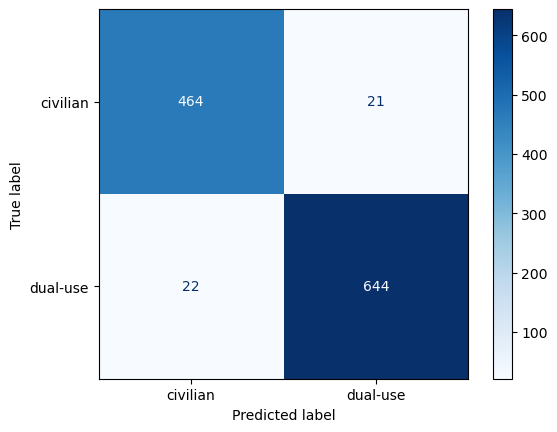

              precision    recall  f1-score   support

    civilian       0.96      0.95      0.96       486
    dual-use       0.97      0.97      0.97       665

    accuracy                           0.96      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.96      0.96      0.96      1151



In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
predictions = pipeline_MNB.predict(X_test)
# creating a classification report
ConfusionMatrixDisplay.from_estimator(pipeline_MNB, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(predictions,y_test))

### 简要解释: Cross-validation/Kreuzvalidierung ist eine Technik zur Bewertung der Leistung von maschinellen Lernmodellen. Sie besteht darin, den Datensatz in mehrere Teilmengen aufzuteilen und mehrere Runden des Trainings und Tests durchzuführen, um die Generalisierungsfähigkeit des Modells auf verschiedenen Datensubsets zu bewerten.

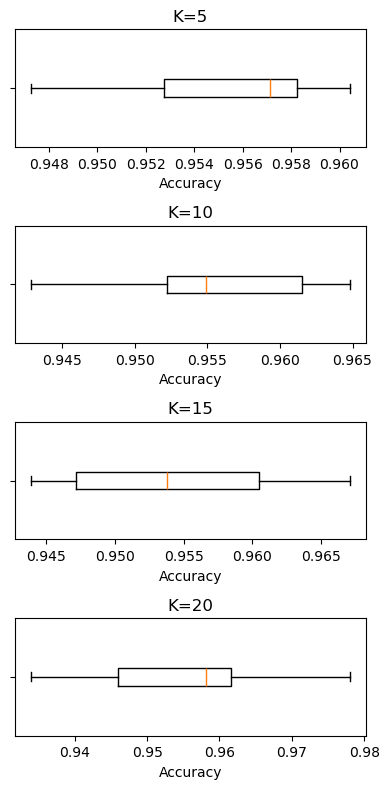

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# 创建 Pipeline
pipeline_MNB = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

# 获取特征和标签
X = df['clean_Abstract']
y = df['use as']

# 设置不同的 K 值
k_values = [5, 10, 15,20]

# 创建子图
fig, axs = plt.subplots(len(k_values), figsize=(4, 2*len(k_values)))

# 对于每个 K 值，绘制箱线图
for i, k in enumerate(k_values):
    # 创建 KFold 对象，指定 K 值
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    # 使用 cross_val_score 函数进行交叉验证
    scores = cross_val_score(pipeline_MNB, X, y, cv=kfold, scoring='accuracy')
    # 绘制箱线图
    axs[i].boxplot(scores, vert=False)
    axs[i].set_title(f'K={k}')
    axs[i].set_xlabel('Accuracy')
    axs[i].set_yticklabels([])

plt.tight_layout()

fig.savefig('cross_k.png')
plt.show()

#### Von den Diagrammen ist zu erkennen, dass bei K=10 die Median-Genauigkeit am höchsten ist und der Interquartilbereich relativ klein ist, ohne Ausreißer. Bei K=20 hingegen, obwohl möglicherweise eine höhere Genauigkeit erreicht wird, ist die Variabilität der Genauigkeit groß und es gibt Ausreißer. Dies deutet darauf hin, dass das Modell in bestimmten Situationen möglicherweise eine instabile Leistung zeigt

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pipeline_MNB = Pipeline([
    ('bow', CountVectorizer()),  # Strings zu Token Integer Zählungen
    ('tfidf', TfidfTransformer()),  # Ganzzahlige Zählungen in gewichtete TF-IDF-Scores
    ('classifier', MultinomialNB()),  # train on TF-IDF Multinomial NB classifier
])

# 获取特征和标签
X = df['clean_Abstract']
y = df['use as']

# 创建 KFold 对象，指定 K 值
kfold = KFold(n_splits=15, shuffle=True, random_state=42)

# 使用 cross_val_score 函数进行交叉验证
scores = cross_val_score(pipeline_MNB, X, y, cv=kfold, scoring='accuracy')

# 打印每次交叉验证的准确率
print("Accuracy:", scores)

# 计算准确率的平均值和标准差
print("Average Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Accuracy: [0.95765472 0.95765472 0.95765472 0.96742671 0.95765472 0.95439739
 0.95765472 0.94788274 0.95439739 0.95114007 0.94462541 0.95765472
 0.94771242 0.95098039 0.94444444]
Average Accuracy: 0.9539290200336377
Standard Deviation: 0.005967145129527747


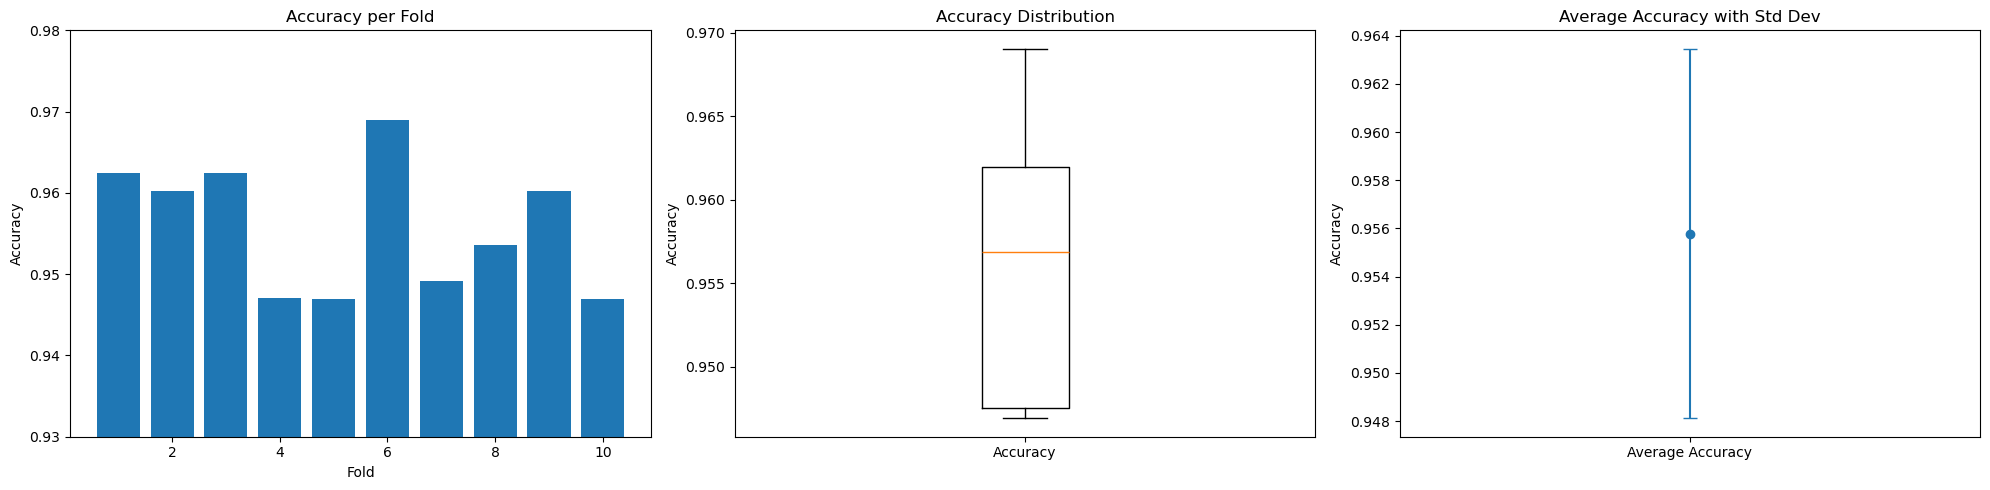

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 准确率数据
accuracies = np.array([0.96247241, 0.9602649, 0.96247241, 0.94701987, 0.94690265,
                       0.96902655, 0.94911504, 0.95353982, 0.96017699, 0.94690265])
# 平均准确率和标准差
average_accuracy = 0.955789329738811
std_dev = 0.007670000712482287

# 创建图形和子图
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 绘制条形图
axs[0].bar(range(1, 11), accuracies)
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy per Fold')
axs[0].set_ylim(0.93, 0.98)  # 设置y轴的范围，增加可读性

# 绘制箱线图
axs[1].boxplot(accuracies)
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Distribution')
axs[1].set_xticklabels(['Accuracy'])

# 绘制误差条图
axs[2].errorbar(1, average_accuracy, yerr=std_dev, fmt='o', capsize=5)
axs[2].set_xlim(0.5, 1.5)  # 限制x轴的范围，让图形更加集中
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Average Accuracy'])
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Average Accuracy with Std Dev')

plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
fig.savefig('cross_10.png')
plt.show()

### Diese Ergebnisse zeigen die Genauigkeit des Modells in 10-facher Kreuzvalidierung. Die durchschnittliche Genauigkeit beträgt 0,9557 mit einer Standardabweichung von 0,00767. Das bedeutet, dass die durchschnittliche Genauigkeit des Modells etwa 96% beträgt und die Genauigkeit relativ stabil ist.
#### Daten- und Modellleistung
Durchschnittliche Genauigkeit: Die durchschnittliche Genauigkeit beträgt 95,58%, was eine relativ hohe Genauigkeit darstellt. Dies zeigt, dass das Modell insgesamt eine gute Vorhersagefähigkeit für den Datensatz hat. Eine Genauigkeit, die nahe oder über 95% liegt, deutet in der Regel darauf hin, dass das Modell bei der ihm gestellten Aufgabe hervorragend abschneidet.
Schwankung der Genauigkeit (Standardabweichung): Die Standardabweichung der Genauigkeit beträgt 0,00767, was relativ klein ist. Dies deutet darauf hin, dass die Leistung des Modells über die verschiedenen Cross-Validation-Folds hinweg relativ stabil ist. Eine geringe Standardabweichung bedeutet, dass das Modell über unterschiedliche Datensätze hinweg eine konsistente Vorhersagefähigkeit besitzt, was ein wichtiger Indikator für eine starke Generalisierungsfähigkeit des Modells ist.
Beurteilung von Daten und Modell
Qualität und Repräsentativität der Daten: Eine hohe Genauigkeit und eine niedrige Standardabweichung könnten darauf hindeuten, dass der Datensatz von hoher Qualität ist und das Problem insgesamt gut repräsentiert. Ein solcher Datensatz kann das Modelllernen und die Generalisierung gut unterstützen.
Modellauswahl und -anpassung: Das Modell scheint sich gut an die Daten anzupassen und kann die Schlüsselmerkmale und Muster in den Daten erfassen. Die Auswahl und Anpassung des Modells scheinen sehr angemessen zu sein, was bedeutet, dass das Modell weder überangepasst (da die Genauigkeit im Testset immer noch hoch ist) noch unterangepasst ist (da die Genauigkeit deutlich über dem Zufallsraten liegt).

In [18]:
# Fit the pipeline to your data first
pipeline_MNB.fit(X_train, y_train)

# Get feature importances using 'feature_log_prob_'
feature_importances = pipeline_MNB.named_steps['classifier'].feature_log_prob_[0]

# Sort features by importance
sorted_features = sorted(zip(feature_importances, pipeline_MNB.named_steps['bow'].get_feature_names_out()), reverse=True)

# Print the top N important features:
top_n = 20  # You can change this value
print(f'Top {top_n} important features:')
for importance, feature in sorted_features[:top_n]:
    print(f'Feature: {feature}, Importance: {importance:.4f}')



Top 20 important features:
Feature: species, Importance: -6.1050
Feature: abstract, Importance: -6.7966
Feature: plant, Importance: -6.8040
Feature: soil, Importance: -6.8319
Feature: available, Importance: -6.8657
Feature: diversity, Importance: -6.8715
Feature: biodiversity, Importance: -6.9208
Feature: data, Importance: -7.1492
Feature: ecosystem, Importance: -7.2490
Feature: climate, Importance: -7.3016
Feature: tree, Importance: -7.3122
Feature: change, Importance: -7.3142
Feature: richness, Importance: -7.3474
Feature: community, Importance: -7.3508
Feature: across, Importance: -7.3547
Feature: global, Importance: -7.3836
Feature: forest, Importance: -7.3854
Feature: effects, Importance: -7.4206
Feature: communities, Importance: -7.4464
Feature: traits, Importance: -7.4785


In [26]:
pipeline_MNB.fit(X_train, y_train)

# Get feature importances using 'feature_log_prob_'
feature_importances = pipeline_MNB.named_steps['classifier'].feature_log_prob_[1]

# Sort features by importance
sorted_features = sorted(zip(feature_importances, pipeline_MNB.named_steps['bow'].get_feature_names_out()), reverse=True)

# Print the top N important features:
top_n = 20  # You can change this value
print(f'Top {top_n} important features:')
for importance, feature in sorted_features[:top_n]:
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Top 20 important features:
Feature: high, Importance: -6.7105
Feature: abstract, Importance: -6.9640
Feature: laser, Importance: -6.9749
Feature: method, Importance: -7.0760
Feature: energy, Importance: -7.0939
Feature: available, Importance: -7.1271
Feature: power, Importance: -7.1554
Feature: based, Importance: -7.1887
Feature: system, Importance: -7.2714
Feature: thermal, Importance: -7.2729
Feature: temperature, Importance: -7.2982
Feature: surface, Importance: -7.3092
Feature: performance, Importance: -7.3102
Feature: results, Importance: -7.3183
Feature: model, Importance: -7.3278
Feature: materials, Importance: -7.3452
Feature: process, Importance: -7.4767
Feature: phase, Importance: -7.4842
Feature: properties, Importance: -7.4944
Feature: structure, Importance: -7.5074


In [27]:

feature_importances = pipeline_MNB.named_steps['classifier'].feature_log_prob_[0]

# Sort features by importance
sorted_features = sorted(zip(feature_importances, pipeline_MNB.named_steps['bow'].get_feature_names_out()), reverse=True)

# Print the top N important features:
top_n = 20  # You can change this value
print(f'Top {top_n} important features:')
for importance, feature in sorted_features[:top_n]:
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Top 20 important features:
Feature: species, Importance: -6.0895
Feature: plant, Importance: -6.7268
Feature: soil, Importance: -6.8003
Feature: abstract, Importance: -6.8226
Feature: diversity, Importance: -6.8637
Feature: available, Importance: -6.8910
Feature: biodiversity, Importance: -6.9855
Feature: data, Importance: -7.1864
Feature: tree, Importance: -7.2108
Feature: ecosystem, Importance: -7.2580
Feature: climate, Importance: -7.2661
Feature: change, Importance: -7.3242
Feature: forest, Importance: -7.3438
Feature: global, Importance: -7.3517
Feature: community, Importance: -7.3527
Feature: richness, Importance: -7.3559
Feature: effects, Importance: -7.3649
Feature: across, Importance: -7.3729
Feature: communities, Importance: -7.3924
Feature: use, Importance: -7.4709


In [28]:
X_test.head()

3683    according classic theory species population dy...
4468    ceramics widely used thermal spraying surface ...
2584    soil microorganisms central sustain soil funct...
69      numerical simulation efficient tool evaluation...
1844    paper devotes develop adaptive neural network ...
Name: clean_Abstract, dtype: object

In [29]:
print(X_train.head())

1173    substituted yig ferrite fe xinxo materials pre...
1954    refractive index profile optical fiber preform...
256     study experimentally three body coulomb explos...
3341    tropical ecosystems experience particularly fa...
4470    achievement low cost simulation test system te...
Name: clean_Abstract, dtype: object


### 随机选择的测试数据集

In [30]:
#!pip3 install lime
import random
from lime.lime_text import LimeTextExplainer

# Ensure random_idx is within the length of X_test
random_idx = random.randint(0, len(X_test) - 1)  # Use randint to generate a valid index

# Classification class names
class_names = ['civilian', 'dual-use']

# Create a LIME text explainer
explainer = LimeTextExplainer(class_names=class_names)

# Your classifier model
c = pipeline_MNB
c.fit(X_train, y_train)

# Explain the prediction for the randomly chosen text
exp = explainer.explain_instance(X_test.iloc[random_idx], c.predict_proba, num_features=30)

# Print related information
print('Random document id from test set: %d' % X_test.index[random_idx])
print('Probability(civilian)=', c.predict_proba([X_test.iloc[random_idx]])[0,0])
print('Probability(dual-use)=', c.predict_proba([X_test.iloc[random_idx]])[0,1])

# Assuming the true class labels are available in a DataFrame that aligns with X_test's index
# Replace 'true_labels_df' with the actual name of the DataFrame containing the true labels
print('True class: %s' % df['use as'].iloc[random_idx])

# Display the features and weights from the LIME explanation
features_with_weights = exp.as_list()
for feature, weight in features_with_weights:
    print(f"{feature}: {weight}")

Random document id from test set: 4036
Probability(civilian)= 0.050308592878340205
Probability(dual-use)= 0.9496914071216646
True class: dual-use
explainable: -0.03162437970562838
program: 0.029174507702396203
intelligent: 0.021797778351502445
ai: 0.02177620989274934
autonomous: 0.015141205880502785
machine: 0.014988542702061963
intelligence: 0.013990291244001272
phase: 0.013452745882702975
interface: 0.012893275500824163
human: -0.012442723134429236
effectively: 0.010541342495849204
dod: 0.010461292689067377
problems: 0.009597047115460782
areas: -0.00929856351367475
learning: 0.008929333918804294
techniques: 0.008631845360232525
darpa: 0.008588771272311986
applications: 0.008281613136827359
wave: 0.00821536755709787
future: -0.007888839206345205
figure: 0.007663167009302753
computer: 0.007552117140797238
performance: 0.0072513087081959235
explain: -0.0067951365951774275
problem: 0.006601662443748089
researchers: -0.0064142630870760034
models: -0.006139916492926529
defense: 0.006137760

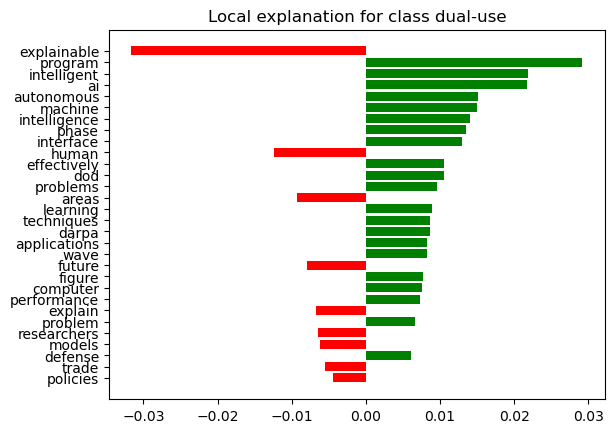

In [31]:
fig = exp.as_pyplot_figure()
fig.savefig('explanation_dual-use.png')

In [32]:
exp.show_in_notebook()

In [33]:
#!pip3 install lime
from lime.lime_text import LimeTextExplainer
class_names=['civilian','dual-use']
explainer = LimeTextExplainer(class_names=class_names)
idx = 1508
c = pipeline_MNB  # Define 'c' as your classifier model
exp = explainer.explain_instance(df.clean_Abstract[idx], c.predict_proba, num_features=30)
print('Document id: %d' % idx)
print('Probability=', c.predict_proba([df.clean_Abstract[idx]])[0,1])
print('True class: %s' % df['use as'][idx])
exp.as_list()


Document id: 1508
Probability= 0.936001729017566
True class: dual-use


[('tunnel', 0.027292172898168265),
 ('displacement', 0.017996637957526065),
 ('spacing', 0.017953077811998137),
 ('cm', 0.016636822052326795),
 ('thrust', 0.015223118298172666),
 ('moment', 0.012825436242257729),
 ('slip', 0.012207724135670634),
 ('protecting', -0.008994111213026141),
 ('bending', 0.008744545337497989),
 ('loads', 0.008720519853571999),
 ('numerical', 0.008421543611336891),
 ('anti', 0.008146124041739481),
 ('spie', 0.007789792138236284),
 ('whether', -0.0074056792567948225),
 ('simulation', 0.007307034630038289),
 ('load', 0.007036939244044313),
 ('engineering', 0.0065305287417501065),
 ('distances', -0.006393552854404362),
 ('top', -0.006368710911983854),
 ('body', -0.005288950728390712),
 ('depending', -0.005190474568313625),
 ('changes', -0.005178855506632312),
 ('economic', -0.005019117429339067),
 ('distance', -0.004782402833976813),
 ('practical', 0.004399111951379709),
 ('gradually', 0.004035646315901972),
 ('respectively', 0.0037885555241611475),
 ('structures

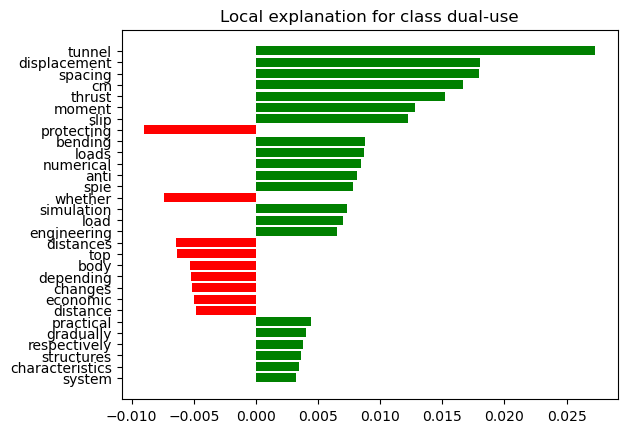

In [34]:
%matplotlib inline
fig = exp.as_pyplot_figure()
fig.savefig('explanation_dual_use.png')

In [35]:
exp.show_in_notebook()

In [59]:
from lime.lime_text import LimeTextExplainer
class_names=['civilian','dual-use']
explainer = LimeTextExplainer(class_names=class_names)
idx = 3074
c = pipeline_MNB  # Define 'c' as your classifier model
exp_1 = explainer.explain_instance(df.clean_Abstract[idx], c.predict_proba, num_features=30)
print('Document id: %d' % idx)
print('Probability=', c.predict_proba([df.clean_Abstract[idx]])[0,1])
print('True class: %s' % df['use as'][idx])
exp.as_list()


Document id: 3074
Probability= 0.016563805474552176
True class: civilian


[('optimization', 0.022847023125926475),
 ('method', 0.02150079517186926),
 ('missing', -0.020262957080563027),
 ('estimations', -0.016435777336456434),
 ('order', 0.016097450651286906),
 ('high', 0.015475205213389657),
 ('modulation', 0.012962166746123712),
 ('statistics', -0.012750650791990233),
 ('technique', 0.012100757275988354),
 ('ieee', 0.011790114115478843),
 ('compressive', 0.01067411345295176),
 ('simulation', 0.010671168709913081),
 ('matrix', 0.009722891171162132),
 ('low', 0.008284913791739413),
 ('advanced', 0.008070369722543906),
 ('proposed', 0.00804170105643705),
 ('estimates', -0.00801542273351161),
 ('paper', 0.007920338538459852),
 ('accuracy', 0.00658018504467723),
 ('achieves', 0.0065662415923520194),
 ('signals', 0.006516622295024963),
 ('traditional', 0.0064691492465040485),
 ('automatic', 0.006427953714880927),
 ('parameters', 0.0063394797393853605),
 ('parameter', 0.0063022841607194855),
 ('observations', -0.0061240606611638925),
 ('fixing', -0.00602462332640

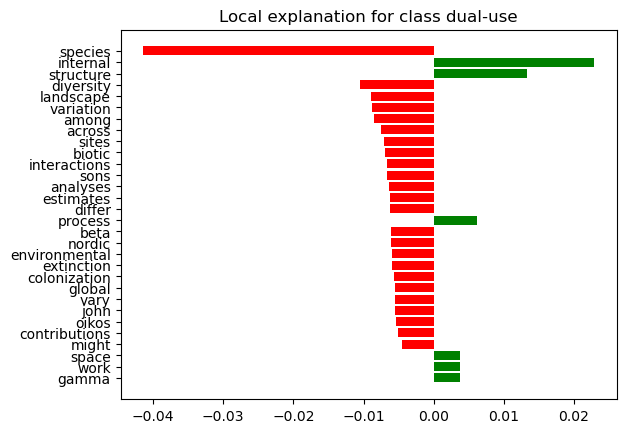

In [60]:
%matplotlib inline
fig = exp_1.as_pyplot_figure()
fig.savefig('explanation_civilian.png')

In [36]:
exp.show_in_notebook()

In [40]:
import joblib 
file_name = 'pipeline.sav'

In [41]:
joblib.dump(pipeline_MNB,file_name)

['pipeline.sav']

In [42]:
model = joblib.load('pipeline.sav') #laden Modell

In [53]:
#Daten von DFG
dfg_1 = ['Treatment of chronic pruritus is an unmet clinical need in patients with dermatological diseases, neuropathy, cholestasis and renal failure. It severely reduces quality of life and is difficult to treat. New major discoveries have identified functional markers for primary pruriceptive afferent neurons (Mrgpr family), peripheral mediators linked to the itch sensation (IL-31, LPA, TSLP) and central transmitters specific for itch processing (BNP, GRP). However, there is also clinical evidence for targets common for nociceptors and pruriceptors (NK1, NaV1.7). Upon translation of this new experimental knowledge from rodents to patients we are facing three major challenges: a) Which of the markers and mediators found in rodents are crucially involved in itch processing in chronic itch patients? b) Itch can be elicited by activation of pruriceptors (“labeled line”), but also nociceptors can generate itch (“pattern theory”); therefore human studies are required to answer the question whether therapeutic targets in humans should be investigated primarily in nociceptors or in specific pruriceptors c) Patients report combined itch and pain sensations both in neuropathic and inflammatory itch conditions, but currently there is no consensus on diagnostic approaches and treatment between the involved disciplines. Therefore, a common concept is required that allows either a clear separation of the entities or alternatively comprehensively describes their overlap.New national and international networks on itch research were established to combine efforts of clinicians and basic researchers bridging various disciplines. For our projects, we took advantage of these multidisciplinary approaches and our long-standing research collaborations to select domestic experts in dermatology, neurology, anesthesiology, gastroenterology, immunology, radiology, and neurophysiology required to approach the complex challenges. Our projects cover three key perspectives on clinical itch: signaling of pruritus (including mediator release from non-neuronal cells and activation of primary afferents), neuronal heterogeneity (differentiating pruriceptors and nociceptors) and neuropathic changes leading to chronic itch and pain. Based on clinical relevance and existing knowledge on pathophysiology, we will focus on major clinical itch conditions: inflammatory (atopic eczema), neuropathic (brachioradial pruritus, notalgia paresthetica) and non-inflammatory (cholestatic pruritus) chronic pruritus. According to the clinical clinical problem, we chose a patient-centered approach in which translational electrophysiological studies provide nociceptor class specific stimulation protocols for the clinical projects.Ultimately, by unifying the currently separated clinical approach between chronic itch (dermatology) and chronic pain (neurology, anesthesiology) we expect to identify common mechanisms of neuronal sensitization that open up new treatment options']
dfg_2 = ['The research group aims to study the difficult interplay of cooperation and competition in the sciences (in the large, German sense of the term) in the 1970s through 1990s. The modern sciences have often been described, particularly in view of the twentieth century, in terms of competition alone. Yet, it is a paradox of the scientific enterprise that only those actors can hope to succeed in competition who are also integrated into cooperative structures. Furthermore, neither competition nor cooperation leads to stable configurations: today’s partners can turn into tomorrow’s rivals and vice versa. The research group sets out to analyse at selected examples – settings that are shaped by this tension – the resulting dilemma and its specific solutions in order to gain a better understanding of the underlying conventions and mechanisms. The participants’ self-conception and their role models as scientists or science policy persons will be studied; the consequences of the increasingly manifest entanglement of science, politics and economy during the time period in question will be analysed; and the formation of new, transnational networks of science investigated. One of the core questions, finally, concerns the epistemic effects of cooperative and competitive configurations and their interplay. Methods and approaches from the history of science that are appropriate to analyse the actors’ behaviour and motivations are combined in this project with a critical, self-conscious impetus: cooperation and competition are open to shaping and change, and scientific actors should be aware of the consequences of their doing so']
dfg_3 = ['The rise of "intelligent" technology is transforming engineering, industry and the economy at an increasing pace and on an unprecedented scale. At the core of this revolution are breakthroughs in the field of machine learning which allow machines to perform tasks that, until recently, could only be performed by humans. Less prominently discussed, developments in machine learning have the potential to transform science at an equally fundamental level. While machine learning methods have been used in the past to tackle isolated prediction problems, recent breakthroughs open up an exciting new opportunity: Automated inference methods will become increasingly useful in the process of scientific discovery itself, supporting scientists in identifying which hypotheses to test, which experiments to perform, and how to extract principles describing a broad range of phenomena.The aim of this cluster is to enable machine learning to take a central role in all aspects of scientific discovery and to understand how such a transformation will impact the scientific approach as a whole. To this end, a substantial research effort is required in the field of machine learning itself. In the cluster, we are going to target the following four research areas:A) Beyond prediction, towards understanding: We will design algorithms that reveal complex structure and causal relationships from data in order to integrate machine learning into the scientific discovery process.B) Managing uncertainty: We will develop tools to estimate and handle the uncertainty in data-driven scientific models and algorithms, and exploit this information for experimental design.C) Interface between algorithms and scientists: We will develop techniques to allow scientists to understand and control all stages of the machine learning process in the scientific discovery pipeline.D) Philosophy and ethics of machine learning in science: The fact that machine learning algorithms will play a central role in the process of scientific discovery challenges our traditional understanding of the scientific process and raises fundamental questions about concepts of scientific discovery and the role of the scientists. We will study these questions from the perspective of philosophy and ethics of science.Our team of principal investigators consists of researchers in machine learning and its applications in various disciplines, including medicine, neuroscience, bioinformatics, vision, cognitive science, physics, geoscience, linguistics and social science, as well as experts in philosophy and ethics. Our cluster will build on the internationally renowned strength of Tübingen as a hub for machine learning as well as on the established excellence in the contributing scientific fields.Machine learning is changing the world, and we want to - and should - take an active role in this process in the area where we are most qualified: in science']
dfg_4 = ['The main scope of the RTG relates to the development, characterization and modelling of novel, revolutionary multi-phase composite systems capable of w/ithstanding temperatures substantially beyond 1300 °C and harsh environmental conditions (e.g., oxidative, corrosive, erosive atmospheres) as far as mechanical behaviour, environmental resistance and durability are concerned. This will be achieved via a materials combination consisting of metallic/intermetallic alloys based on refractory metal silicide systems (e.g. Mo-Si-B-X, X = Nb, Fe, Ti, Hf...) as substrates and polymer-derived ceramic nanocomposites based on Si(M)CY (M = B, Zr, Hf and Y = O, N) as materials of choice for graded coatings. The metallic/intermetallic alloys may provide adequate deformability and toughness at ambient temperatures combined \Mth excellent high-temperature microstructural stability and creep resistance, whereas the graded polymer derived ceramic nanocomposite coatings will also offer self-healing capability in addition to extremely low intrinsic thermal conductivities and excellent stability in aggressive operation conditions, respectively. Beside their unique property combinations, the two materials classes are highly attractive because of the possibility to adjust their coefficients of thermal expansion to perfectly match one another and consequently to keep thermomechanical stresses in the target multi-layered systems at a minimum. This may give rise to an extended lifetime of components in foreseen application. Within the frame of this RTG, PhD researchers will be trained in a coordinated and multidisciplinary manner to address the following fundamental aspects: (A) Synthesis of the composite materials in lab scale with tailor-made microstructures and properties (see C and D); (B) Analysing the feasibility of large-scale manufacturing processes for the materials compounds; (C) Understanding the fundamental relations between synthesis, microstructure and properties of novel complex composite materials to withstand continuous service temperatures in the range of 1300 to 1500 °C for substrate and coating, this includes the determination of properties with state-ofthe- art methods and techniques; (D) Making reliable simulations and predictions based on the materials microstructures and properties for typical engineering applications. The above described approach will enable us to educate a new generation of PhD researchers who will have state-of-the-art expertise in knowledge-based design of completely metallic/intermetallic/ceramic based materials systems in ultrahigh temperature environments']
dfg_6 =['The Collaborative Research Centre Episteme in Motion is dedicated to studying knowledge change in selected premodern cultures from Europe and beyond. The Centre investigates longue-durée processes of knowledge change in particular historical configurations and develops a methodology for their description. While there has been a wide-spread tendency to view premodern knowledge as primarily static – both within the premodern cultures themselves but also in the eyes of modern scholars – the Centre’s guiding hypothesis is that premodern knowledge was subject to constant change, especially in cases where there have been powerful claims to the contrary. For the purpose of understanding the specific dynamics of premodern knowledge change, the Centre has developed two closely-linked analytical terms: ‘episteme’ and ‘transfer’. ‘Episteme’ conceives of knowledge as a ‘knowledge of something’ that is always invested with some claim to validity – a claim which becomes manifest in particular discourses and practices and can never be understood without a consideration of its mediality and materiality. The term ‘transfer’, as understood by the Centre, denotes a form of knowledge change that consists in re-contextualisations that transform knowledge within new configurations and entanglements. Precisely because knowledge change is thus marked by constantly shifting reciprocal relations, its analysis makes it necessary to overcome traditional categories such as ‘period’ or ‘culture’. As a consequence of these observations, the Centre has developed the concept of ‘oikonomies of knowledge’ that encapsulates the multidirectional dynamism of premodern processes of knowledge change, as well as rendering analytically accessible the implicit norms, selection processes, invisible rules and power structures that shape the transformation of knowledge. During the Centre’s third funding period, a new concept, momentum, will play a key role for the Centre’s research programme. Momentum is designed to yield insight into the particular impulses within the multidirectionality that is central to knowledge change']
dfg_7=['The aim of the CRC is to elucidate cognitive and neural mechanisms underlying the volitional control of goa-directed action as well as to investigate impairments of self-control. The ability to exert volitional control over one’s actions is a precondition for personal autonomy and one of the most impressive yet least under-stood capacities our brains endow us with. Conversely, impairments of volitional self-control are a charac-teristic of many harmful behaviors such as unhealthy eating habits, substance use, and behavioral addic-tions, which are associated with massive adverse consequences for individuals and great societal costs. The CRC thus addresses not only one of the major scientific challenges for basic research in psychological and neuroscience, but also a topic of high social relevance. Our research program rests on an integrative theoretical framework, according to which volitional control rests on dynamic interactions between multiple neurocognitive systems. Based on this framework, the three project groups address the following key ques-tions.(A) Mechanisms. Which cognitive mechanisms and neural systems underlie the volitional control of goal-directed actions, the flexible adaptation of behavior to changing goals and environments, and the ability to exert self-control (i.e., to inhibit impulsive responses and transient desires in favor of long-term goals)? (B) Modulators. How are volitional control processes modulated by motivational factors, personality traits, stress, and associated neurotransmitter systems, and how do these systems change across the lifespan? (C) Dysfunctions. What are underlying mechanisms of impaired volitional control in mental disorders such as substance use disorders, behavioral addictions, anorexia nervosa, and compulsivity?The CRC integrates a wide range of methods from experimental and biological psychology, cognitive com-putational, and social neuroscience, as well as clinical psychology, psychiatry, and developmental neuro-science. Based on a rich set of new empirical findings and theoretical insights from previous funding peri-ods, in the new funding period we will put particular emphasis on three aims that cut across the three project groups: (i) the integration of the hitherto neglected role of social-cognitive processes in volitional control; (ii) the use fo novel technologies to bridge the gap between laboratory experiments and assessments of real-life behavior; and (iii) the development of computational models of cognitive control. Thereby, we expect the CRC to lay foundations for improved prevention and treatment of self-control impairments (in coopera-tion with the CRC/TRR 265), to promote the transfer of insights into cognitive control into the field of man-machine-interaction (in cooperation with the Cluster of Excellence CeTI), as well as to set new impulses for philosophical and societal discourses on autonomy, rationality, and responsibility.']
dfg_8= ['Virusinfektionen sind nach wie vor eine große Bedrohung für die Gesundheit von Mensch und Tier. Sie haben enorme Auswirkungen auf die globale Wirtschaft und sind für einen erheblichen Teil der weltweiten Gesundheitskosten verantwortlich. RNA-Viren sind von besonderem Interesse, da ihrer Replikationsmaschinerie weitestgehend eine Korrekturfunktion fehlt und dies zur Entstehung neuer pathogener Varianten führen kann, die effizient auf neue Wirte übertragen werden und dort replizieren. Ein prominentes Beispiel für dieses Phänomen ist die aktuelle COVID-19-Pandemie, die durch SARS-CoV-2, ein RNA-Virus aus der Familie der Coronaviridae, verursacht wird. Der SFB 1021 erforscht RNA-Viren aus verschiedenen Virusfamilien, darunter auch hochpathogene (oft zoonotische) Viren, die z.B. hämorrhagisches Fieber, Enzephalitis oder akutes Atemnotsyndrom verursachen. Die Forschungsarbeiten im SFB 1021 werden in drei Projektbereichen durchgeführt: (i) Synthese und Metabolismus viraler RNA, (ii) virale Faktoren, die die Pathogenität von RNA-Viren bestimmen, und (iii) zelluläre Antworten auf RNA-Virusinfektionen und virale Faktoren, die diesen zellulären Antworten direkt entgegenwirken oder den Viren helfen ihnen zu entgehen. Die geplanten Studien basieren auf der umfangreichen RNA-Virus-Expertise, dieses Konsortiums, einschließlich der Verfügbarkeit, Generierung und Verwendung genetisch eng verwandter Viren oder nahezu identischer Varianten desselben Virus (Pathotypen) mit grundlegend unterschiedlichen pathogenen Eigenschaften in spezifischen Wirten. Der SFB 1021 setzt eine breite Palette moderner Methoden und Technologien (einschließlich Genomik- und Proteomik-Analysen) ein, um RNA-Viren zu untersuchen und neue Erkenntnisse über grundlegende Aspekte der RNA-Virusreplikation zu erhalten. Ferner werden die vielfältigen und dynamischen Wechselwirkungen viraler Faktoren mit zellulären Signalwegen untersucht, sowie regulatorische Netzwerke, die an der Schnittstelle zwischen Virus und Wirt wirken und die Pathogenität von RNA-Viren bei Mensch und Tier bestimmen. Um diese Ziele zu erreichen, verfolgt der SFB 1021 einen multidisziplinären Ansatz, der Forscherinnen und Forscher mit einer hochgradig komplementären Kombination aus technischen Fähigkeiten und wissenschaftlicher Expertise in den Bereichen RNA-Virologie, Zellbiologie, Biochemie, Allergologie, pharmazeutische Wissenschaften und Pharmakologie zusammenbringt.']

print(f'Predicted results dfg_1:{model.predict(dfg_1)}')
print(f'Predicted results dfg_2:{model.predict(dfg_2)}')
print(f'Predicted results dfg_3:{model.predict(dfg_3)}')
print(f'Predicted results dfg_4:{model.predict(dfg_4)}')
print(f'Predicted results dfg_6:{model.predict(dfg_6)}')
print(f'Predicted results dfg_7:{model.predict(dfg_7)}')
print(f'Predicted results dfg_8:{model.predict(dfg_8)}')

Predicted results dfg_1:['civilian']
Predicted results dfg_2:['civilian']
Predicted results dfg_3:['dual-use']
Predicted results dfg_4:['dual-use']
Predicted results dfg_6:['civilian']
Predicted results dfg_7:['civilian']
Predicted results dfg_8:['civilian']


In [80]:

predicted_probabilities = model.predict_proba(dfg_6)

# 打印预测的概率
for i, probs in enumerate(predicted_probabilities):
    print(f"Text {i+1}:")
    print(f"The probability of 'dual-use': {probs[1]*100:.2f}%")
    print(f"The probability of 'civilian': {probs[0]*100:.2f}%")

Text 1:
The probability of 'dual-use': 23.69%
The probability of 'civilian': 76.31%


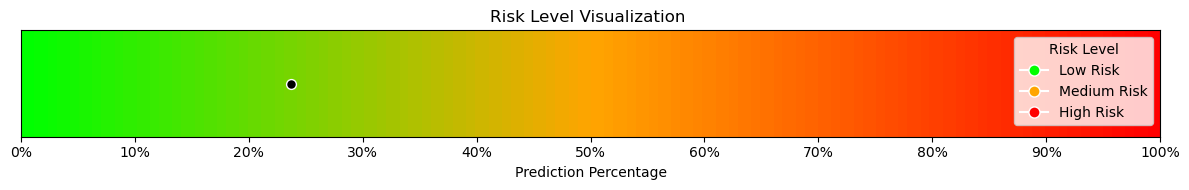

The probability of 'dual-use': 23.69%


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 创建一个渐变色映射
def create_gradient_cmap(start_color, mid_color, end_color):
    colors = [start_color, mid_color, end_color]
    n_bins = 100  # 更多的bins将使颜色过渡更平滑
    cmap_name = 'riskGradient'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 创建渐变色映射
gradient_cmap = create_gradient_cmap("#00FF00", "#FFA500", "#FF0000")

# 示例概率数据（在这里使用静态数据代替model.predict_proba的输出）
predicted_probabilities = model.predict_proba(dfg_6)

# 绘制渐变背景
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=gradient_cmap, extent=(0, 100, 0, 1))

# 标注每个预测数据点
fig, ax = plt.subplots(figsize=(12, 2))

# 绘制渐变背景
ax.imshow(gradient, aspect='auto', cmap=gradient_cmap, extent=(0, 100, 0, 1))

# 标注每个预测数据点为圆点，调整圆点大小为50（之前示例中为100）
for pct in percentages:
    ax.scatter(pct, 0.5, color='black', s=50, edgecolor='white', zorder=8)

# 设置X轴的范围和标签
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10), [f"{x}%" for x in np.arange(0, 101, 10)])
plt.yticks([])
plt.xlabel('Prediction Percentage')

# 添加图例，同样调整图例中圆点的大小
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low Risk',
                              markerfacecolor='#00FF00', markersize=8),
                   plt.Line2D([0], [0], marker='o', color='w', label='Medium Risk',
                              markerfacecolor='#FFA500', markersize=8),
                   plt.Line2D([0], [0], marker='o', color='w', label='High Risk',
                              markerfacecolor='#FF0000', markersize=8)]
ax.legend(handles=legend_elements, title="Risk Level")

plt.title('Risk Level Visualization ')
plt.tight_layout()
plt.show()
print(f"The probability of 'dual-use': {probs[1]*100:.2f}%")

In [56]:
#Daten von DARPA
darpa_1 = ['The Bioelectronics for Tissue Regeneration (BETR) program will develop technology aimed at speeding warfighter recovery, and thus resilience, by directly intervening in wound healing. To do this, researchers will build an adaptive system that uses actuators to biochemically or biophysically stimulate tissue, sensors to track the body’s complex response to that stimulation, and adaptive learning algorithms to integrate sensor data and dictate intervention to the actuators. After establishing this closed-loop control over physiological processes, BETR researchers will integrate these devices into a single platform that guides the tissue in real-time along an optimal growth pathway. Ultimately, through the BETR program DARPA aims to provide medical interventions with the necessary sophistication to more quickly restore complex human tissues after injury. The effort notably focuses on injuries relevant to the warfighter such as blast and burn damage to skin, muscle, and nerves. If the program succeeds, warfighters could return to duty sooner and more fully healed']
darpa_2 = ['Water transport is as mission-critical and as logistically challenging as fuel transport for the U.S. military. Meeting deployed military water needs requires equipment resources, consumes fuel, and endangers personnel. The goal of DARPA’s Atmospheric Water Extraction (AWE) program is to provide potable freshwater for a range of military, stabilization, and humanitarian needs through the development of small, lightweight, low-powered, distributable systems that extract potable water from the atmosphere to meet the drinking needs of individuals and groups, even in extremely arid climates.AWE seeks to develop next-generation, scalable sorbent materials that can rapidly extract water from ambient air and leverage advanced modeling, innovative engineering, and additive manufacturing methods to achieve a substantial reduction in the size, weight, and power (SWaP) requirements compared to current atmospheric water generation technologies.AWE will address water needs in two tracks: expeditionary and stabilization. The expeditionary unit will provide sufficient drinking water for an individual warfighter, with SWaP parameters restricted by the need for portability and operation in austere environments. The stabilization device will provide the daily drinking needs for up to ~150 people (i.e., a company or humanitarian mission), with SWaP requirements tailored to resources available to missions of that scale']
darpa_3 = ['The space domain is essential to modern commerce, scientific discovery, and national defense. Maintaining space domain awareness in cislunar space – the volume of space between the Earth and the Moon – will require a leap-ahead in propulsion technology.The goal of the Demonstration Rocket for Agile Cislunar Operations (DRACO) program is to demonstrate a nuclear thermal propulsion (NTP) system on orbit. NTP uses a nuclear reactor to heat propellant to extreme temperatures before expelling the hot propellant through a nozzle to produce thrust. Compared to conventional space propulsion technologies, NTP offers a high thrust-to-weight ratio around 10,000 times greater than electric propulsion and two-to-five times greater specific impulse (i.e. propellant efficiency) than chemical propulsion.The DRACO program anticipates two tracks. Track A will include the baseline design of a NTP reactor and culminate in a baseline design review. Track B will include development of an operational system concept to meet operational mission objectives and a demonstration system design that is traceable to the operational system but focuses on demonstrating the propulsion subsystem. Track B is anticipated to culminate in a technology maturation plan review for the demonstration system.']
darpa_4 = ['The DoD has a critical need for enhancing and replacing components of existing software with more secure and more performant code. This includes cases where a key performance or security benefit comes from moving parts of the software to new hardware, such as utilizing hardware accelerators, isolation enclaves, offload processors, and distributed computation. However, introducing enhancements or replacements into large legacy code bases carries a high risk that new code will not safely compose with the rest of the system. Verified programming methodologies for creating software that is correct-by-construction are currently not effective for lowering this risk, because they focus on clean-slate software construction, assume an existing formal specification that is typically not available for a legacy system, and require formal methods expertise typically not accessible to developers.The goal of the V-SPELLS program is to create a developer-accessible capability for piece-by-piece enhancement of software components with new verified code that is both correct-by-construction and compatible-by-construction, i.e., safely composable with the rest of the system. V-SPELLS will create practical tools for developers to gain benefits of formal software verification in incremental software (re)engineering rather than only in clean-slate introduction. V-SPELLS tools will enable developers to deliver assured incremental modernization of legacy systems in a manner that leverages verification technologies and reduces rather than raises risk. V-SPELLS aims to radically broaden adoption of software verification by enabling incremental introduction of superior technologies into systems that cannot be re-designed from scratch and replaced as a whole.To accomplish these goals, the V-SPELLS program will leverage a combination of novel concepts in program understanding and verification, as well as recent developments in domain specific languages and composable system architectures for production systems at scale. The program seeks breakthroughs in and novel approaches to the following technical challenges, including, but not limited to:Automated program understanding to infer architectural structure, assumptions, and dependencies in a legacy source code base, enabling its decomposition into components with explicit modular structure, interfaces, dependencies, and constraints. Recovery of domain abstractions and models from legacy code bases, in succinct and expressive representations suitable for programming functional component enhancements or replacements that are safely composable with the existing systems.Matching known and extracted domain abstractions and models with legacy code, lifting of legacy code to succinct, enhanceable, safely composable, and inter-operating representations, and automated specification inference leveraging such representation. Provably safe composition of enhancements with the rest of the system.Overcoming performance reduction due to added layers of abstraction with novel verified cross-layer optimization and distribution techniques (“verified stack flattening and distribution”). Development of non-brittle and granular rules for composable representation, packaging, and transformation of software verification proofs that support distribution and orchestration of verified programs.']
darpa_5 = ['The goal of the Adapting Cross-Domain Kill-Webs (ACK) program is to provide a decision aid for mission commanders to assist them with rapidly identifying and selecting options for tasking – and retasking – assets within and across organizational boundaries. Specifically, ACK will assist users with selecting sensors, effectors, and support elements across military domains (space, air, land, surface, subsurface, and cyber) that span the different military Services to deliver desired effects on targets. Instead of limited, monolithic, pre-defined kill chains, these more disaggregated forces can be used to formulate adaptive “kill webs” based on all of the options available.There are three major challenges to realizing the ACK goals. First, during execution, mission commanders have little or no insight into what capabilities are available across domains and what capacity or quality of service other domains may be able to offer. Second, each domain has its own set of authorities and missions they are tasked to service, making it challenging to assess meaningful tradeoffs of the “value” or “cost” of supporting new missions originating from another domain versus their own current set of missions. Third, given a set of diverse cross-domain kill web options, decision-makers need a way to compare them rapidly and select the “best” option. The ACK program is leveraging commercially developed solutions adapted from e-commerce and is modifying them to help address these challenges. These algorithms are then combined with a “Virtual Liaison” service abstraction from a much larger “Capability Marketplace” to enable decentralized Joint All-Domain adaptation. The program is currently investigating the right bid and offer language necessary between consumers and suppliers in the marketplace along with evaluating the relative merits of the different technical approaches. These include assessing the processing and bandwidth requirements along with characterizing any limitations with respect to marketplace size (relative and absolute numbers of consumers, suppliers, constraints, etc), Virtual Liaison architectural representation, and planning horizon.ACK will enable multiple warfighters to define distributed effects and adapt them at combat speed using a shared set of resources. This will increase lethality and capitalize on latent capacity within the existing warfighting force structure by pairing the right sensor and weapon together for a given target and operational problem. This will also create greater resilience by enabling rapid substitutions if a capability is lost and will make the current force more efficient by enabling better sharing of resources across domains to balance tasking loads.Finally, the tools developed in ACK will aid with the protection of sensitive capabilities by allowing capability providers (suppliers) to offer assets across domains in terms of the effects they can provide, without exposing details regarding how those effects will be achieved (i.e. without revealing sources and methods). If the program is successful, the technology developed under ACK will be an important enabler for the new Joint All-Domain concepts that the Services are pursuing at both operational and tactical levels']
darpa_6 = ['The Advanced Plant Technologies (APT) program seeks to develop plants capable of serving as next-generation, persistent, ground-based sensor technologies to protect deployed troops and the homeland by detecting and reporting on chemical, biological, radiological, nuclear, and explosive (CBRNE) threats. Such biological sensors would be effectively energy-independent, increasing their potential for wide distribution, while reducing risks associated with deployment and maintenance of traditional sensors. These technologies could also potentially support humanitarian operations by, for example, detecting unexploded ordnance in post-conflict settings.DARPA’s technical vision for APT is to harness plants’ innate mechanisms for sensing and responding to environmental stimuli, extend that sensitivity to a range of signals of interest, and engineer discreet response mechanisms that can be remotely monitored using existing ground-, air-, or space-based hardware. To succeed, APT must ensure that modified plants are safe, robust, and self-sustaining in their environments. The program hinges on the advancement of technologies for performing multiple, complex modulations to plants, without sacrificing their environmental fitness.Although APT pursues technology for eventual deployment, the initial research is conducted entirely in contained facilities. If the research is successful, later-phase field trials would take place under the auspices of the U.S. Department of Agriculture’s Animal and Plant Health Inspection Service following all standard protocols for plant biosafety']
print(f'Predicted results darpa_1:{model.predict(darpa_1)}')
print(f'Predicted results darpa_2:{model.predict(darpa_2)}')
print(f'Predicted results darpa_3:{model.predict(darpa_3)}')
print(f'Predicted results darpa_4:{model.predict(darpa_4)}')
print(f'Predicted results darpa_5:{model.predict(darpa_5)}')
print(f'Predicted results darpa_6:{model.predict(darpa_6)}')
darpa_7 = ['The goal of All Together Now (ATN) is to develop theoretical protocols and experimental techniques that enable new collective atom regimes, leading to sensitivities approaching the ultimate fundamental limits of performance. Quantum sensors, such as atomic clocks and atom interferometers, are currently reaching the independent atom limit in which the uncertainty of the sensor scales with the number N of atoms as 1/√N (known as the standard quantum limit). However, the ultimate fundamental limit of performance scales as 1/N if one allows correlations between the atoms. In quantum sensors such as optical lattice clocks using trapped reservoirs of tens of thousands of atoms, improvements of a few orders of magnitude are thus possible. In order to approach this fundamental limit, however, the system must leverage collective quantum effects that have until now proven difficult to prepare and observe.ATN investigates superradiant lasing, a lasing regime that may lead to unprecedented laser linewidths and coherence, that is insensitive to environmental perturbation. The program also explores the potential for novel collective atomic laser cooling regimes, and aims to develop an entangled 3D optical lattice clock. If successful, this system could yield environmentally insensitive ultra-narrow linewidth lasers and optical atomic clocks with one-second stabilities exceeding current state-of-the-art flicker floors reached after thousands of seconds of averaging times.ATN developments will not only provide a feasibility study of atomic clock operation at the fundamental limit, but the techniques developed in this program may be integrated into the next generation of timekeeping devices, IMUs, magnetometers, and gravimeters.']
print(f'Predicted results darpa_7:{model.predict(darpa_7)}')
darpa_8 = ['The MuS2 program seeks to develop a directional source of muons produced at relevant energies and intensities and in sufficient quantities to support demonstrations of national security and scientific applications. The program will investigate the generation of directional muon beams with 10 to 100 giga-electron volt (GeV) energies and produce 106 to 108 muons, while showing a clear path to a practical design for a transportable system.Planned execution of MuS2 will occur in two 24-month phases. Phase 1 is intended to conduct initial modeling, empirical studies, and design work to support proof of feasibility. Phase 2 is intended to refine the modeling, experiments, and design through a critical design review and has the goal or producing up to 108 100-GeV muons for relevant scientific and security demonstrations.']
print(f'Predicted results darpa_8:{model.predict(darpa_8)}')  

Predicted results darpa_1:['dual-use']
Predicted results darpa_2:['dual-use']
Predicted results darpa_3:['dual-use']
Predicted results darpa_4:['dual-use']
Predicted results darpa_5:['dual-use']
Predicted results darpa_6:['dual-use']
Predicted results darpa_7:['dual-use']
Predicted results darpa_8:['dual-use']


In [36]:
usdod = ['This article investigates the applicability of a recently proposed, nonlinear sparse Bayesian learning (NSBL) algorithm to identify and estimate the complex aerodynamics of limit cycle oscillations. NSBL provides a semi-analytical framework for determining the data-optimal sparse model nested within a (potentially) over-parameterized model. This is particularly relevant to nonlinear dynamical systems where modelling approaches involve the use of physics-based and data-driven components. In such cases, the data-driven components, where analytical descriptions of the physical processes are not readily available, are often prone to overfitting, meaning that the empirical aspects of these models will often involve the calibration of an unnecessarily large number of parameters. While an overparameterized model may fit the observed data well, such models may be inadequate for making predictions in regimes that are different from those wherein the data were recorded. In view of this, it is desirable to not only calibrate the model parameters, but also identify the optimal compromise between data fit and model complexity. In this article, we exhibit the optimal model discovery for an aeroelastic system wherein the structural dynamics are well-known and described by a differential equation model, coupled with a semi-empirical aerodynamic model for laminar separation flutter, resulting in low-amplitude limit cycle oscillations (LCO). To illustrate the performance of the algorithm, in this article, we use synthetic data and demonstrate the ability of the algorithm to correctly rediscover the optimal model and model parameters, given a known data-generating model. The synthetic data are generated from a forward simulation of a known differential equation model with parameters selected so as to mimic the dynamics observed in wind-tunnel experiments. Subsequently, we demonstrate the performance of the algorithm for model selection using noisy LCO data from wind tunnel experiments. As there is no ground truth available for the experimental data case, we provide a comparison between NSBL and Bayesian model selection to validate the results, and demonstrate the use of NSBL as an efficient alternative to traditional methods.']
print(f'Predicted results usdod:{model.predict(usdod)}')#United States Department of Defense

Predicted results usdod:['dual-use']


In [37]:
mpiwg=['In the present work, we model the diffusion of scientific knowledge embodied in the textbooks of the Sphaera corpus. This corpus consists of more than 350 different editions of textbooks used for teaching astronomy in European universities during the early modern period. Connections between the editions are based on mutual semantic knowledge and are arranged in a multiplex network of four layers, with each layer representing a different semantic relation. The modeling aims for a better understanding (and possible prediction) of the process of knowledge accumulation in the various editions. We consider semantic text-parts as knowledge units transferred between the editions, and show how these units spread using both an SI model and its modified version, the Bass model. Both models include a parameter representing the rate of transfer, which is interpreted as the mechanism underlying the process of knowledge accumulation; the Bass model has an extra parameter that represents the rate of external influence and stands out as the “resistance to adoption from” and “resistance to be influenced by” other knowledge systems. The modeling has helped us to chart the path and mechanisms of knowledge transformation in the early modern period. Networks are identified by adding further layers whose graphs express socioeconomic relationships and conditional sub-networks. The comparison between the model and these layers enables us to conclude that the accumulation of knowledge was highly dependent on the institutional embedding of scientific production because the diffusion of knowledge was mostly determined by the economic constraints of early modern printers and publishers. It further suggests that geographic proximity played a role—although secondary—in the diffusion of knowledge but only under the condition that the book producers involved were still living. The transformation of early modern scientific knowledge is, therefore, highly dependent on the institutional and economic contexts of the book producers. © 2023, Springer Nature Limited.']
print(f'Predicted results mpiwg:{model.predict(mpiwg)}')

Predicted results mpiwg:['civilian']


In [38]:
import pickle
with open('pipeline_MNB.pkl', 'wb') as f:
    pickle.dump(model, f)